[코드 9.2.1]

In [3]:
import torch 
import torch.nn as nn 
import numpy as np

data=[[[1], [2], [3], [4], [5]],
       [[6], [7], [8], [9], [10]],
       [[11],[12],[13],[14],[15]],
       [[16],[17],[18],[19],[20]]] 
input=torch.FloatTensor(np.array(data))

INPUT_SIZE = 1    #입력의 feature 수
SEQUENCE_LENGTH = 5
HIDDEN_SIZE = 2   #은닉상태의 feature 수
NUM_LAYERS = 1    #은닉층의 수
BATCH_SIZE = 4

torch.manual_seed(0) # reproducibility
model = nn.RNN(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, batch_first=True)
#파이토치에서는 nn.RNN 클래스를 호출하여 RNN을 구현 가능
# batch_first=True이면 batch_size의 위치가 맨 앞에 위치한다.
# input size : (batch, seq_len, input_size)
# out shape = (batch, seq_len, num_directions * hidden_size)
# h_n shape  = (num_layers * num_directions, batch_size, hidden_size) --> batch_first=True 지정 유무와 무관

output, h_n = model(input)
#output은 모든 타임 스텝에 대한 결과
#h_n은 t=n인 마지막 타임 스텝에 대한 은닉상태값
print('Input: ', input.shape, '\n', input)
print('\nOutput: ', output.shape, '\n', output)
print('\nHidden: ', h_n.shape, '\n', h_n)

ModuleNotFoundError: No module named 'torch'

[코드 9.2.2]

In [ ]:
data = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
#print("Data: ", data.shape, "\n", data)

INPUT_SIZE = 1
SEQUENCE_LENGTH = 5
HIDDEN_SIZE = 2
NUM_LAYERS = 1
BATCH_SIZE = 4

torch.manual_seed(0) # reproducibility
model = nn.RNN(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, batch_first=True)
# input size : (batch, sequence_length, input_size)
input = data.view(BATCH_SIZE, SEQUENCE_LENGTH, INPUT_SIZE)
# out shape = (batch, sequence_length, num_directions * hidden_size)
# h_n shape  = (num_layers * num_directions, batch, hidden_size)
output, h_n = model(input)

print('Input: ', input.shape, '\n', input)
print('\nOutput: ', output.shape, '\n', output)
print('\nHidden: ', h_n.shape, '\n', h_n)

Input:  torch.Size([4, 5, 1]) 
 tensor([[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.],
         [20.]]])

Output:  torch.Size([4, 5, 2]) 
 tensor([[[-0.0819,  0.8100],
         [-0.4311,  0.9332],
         [-0.3162,  0.9748],
         [-0.3979,  0.9875],
         [-0.3675,  0.9944]],

        [[-0.1081,  0.9953],
         [-0.5145,  0.9986],
         [-0.3269,  0.9995],
         [-0.4254,  0.9997],
         [-0.3820,  0.9999]],

        [[-0.1342,  0.9999],
         [-0.5245,  1.0000],
         [-0.3458,  1.0000],
         [-0.4382,  1.0000],
         [-0.3982,  1.0000]],

        [[-0.1601,  1.0000],
         [-0.5328,  1.0000],
         [-0.3648,  1.0000],
         [-0.4506,  1.0000],
         [-0.4143,  1.0000]]], grad_fn=<Transpose

 [코드 9.2.3]

In [ ]:
import torch
import numpy as np

torch.manual_seed(0) # reproducibility

char_set = ['h', 'e', 'l', 'o']
input_size = len(char_set) # = 4
hidden_size = len(char_set) # = 4
num_layers = 1

x_data = [[0, 1, 2, 2]] # hell
# batch_size = 1
x_one_hot = [[[1, 0, 0, 0], # ‘h'
 [0, 1, 0, 0], # ‘e'
 [0, 0, 1, 0], # ‘l'
 [0, 0, 1, 0]]] # ‘l'
y_data = [[1, 2, 2, 3]] # ello

#transforms as torch tensor 
inputs = torch.FloatTensor(x_one_hot)
labels = torch.LongTensor(y_data)
#print('입력 데이터의 크기 : {}'.format(inputs.shape))
#print('레이블의 크기 : {}'.format(labels.shape))

#declare RNN
# batch_first guarantees the order = (batch_size, sequence_length, input_size)
rnn= torch.nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
#print(model)
#loss & optimizer setting
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.1)

#start training
num_epochs=20
for i in range(num_epochs):
    outputs, _ = rnn(inputs)  
    loss = loss_function(outputs.view(-1, input_size),labels.view(-1))   
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print("epoch =", i+1,",", "loss=", round(loss.item(),4),",", "pred =",  result_str) # ello 

epoch = 1 , loss= 1.1658 , pred = elll
epoch = 2 , loss= 0.9308 , pred = llll
epoch = 3 , loss= 0.816 , pred = lllo
epoch = 4 , loss= 0.7669 , pred = lloo
epoch = 5 , loss= 0.7018 , pred = lllo
epoch = 6 , loss= 0.6431 , pred = ello
epoch = 7 , loss= 0.5951 , pred = ello
epoch = 8 , loss= 0.5559 , pred = ello
epoch = 9 , loss= 0.5248 , pred = ello
epoch = 10 , loss= 0.5012 , pred = ello
epoch = 11 , loss= 0.4836 , pred = ello
epoch = 12 , loss= 0.469 , pred = ello
epoch = 13 , loss= 0.4572 , pred = ello
epoch = 14 , loss= 0.4503 , pred = ello
epoch = 15 , loss= 0.4463 , pred = ello
epoch = 16 , loss= 0.4414 , pred = ello
epoch = 17 , loss= 0.437 , pred = ello
epoch = 18 , loss= 0.4338 , pred = ello
epoch = 19 , loss= 0.4284 , pred = ello
epoch = 20 , loss= 0.4232 , pred = ello


[코드 9.2.4]

In [ ]:
import torch
import torch.nn as nn
import numpy as np

torch.manual_seed(0)  # reproducibility

# hyperparameters
learning_rate = 0.1
num_epochs = 20

char_set = ['h', 'e', 'l', 'o']

# Teach hello: hell -> ello
x_data = [[0, 1, 2, 2]] # hell
# batch_size = 1
x_one_hot = [[[1, 0, 0, 0], # ‘h'
 [0, 1, 0, 0], # ‘e'
 [0, 0, 1, 0], # ‘l'
 [0, 0, 1, 0]]] # ‘l'
y_data = [[1, 2, 2, 3]] # ello


# As we have one batch of samples, we will change them to variables only once
inputs = torch.Tensor(x_one_hot)
labels = torch.LongTensor(y_data)

num_classes = 4
input_size = 4  # one-hot size
hidden_size = 4  # output from the RNN. 4 to directly predict one-hot
num_layers = 1

class RNN(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.num_classes = num_classes
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers= num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        # Reshape output from (batch, seq_len, hidden_size) to (batch *
        # seq_len, hidden_size)
        out = out.view(-1, self.hidden_size)
        # Return outputs applied to fully connected layer
        out = self.fc(out)
        return out


# Instantiate RNN model

rnn = RNN(num_classes, input_size, hidden_size, num_layers )
# Set loss and optimizer function
loss_function = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

# Train the model

for epoch in range(num_epochs):
    outputs = rnn(inputs)    
    loss = loss_function(outputs, labels.view(-1))   
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()    
    result = outputs.data.numpy().argmax(axis=1)   
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print("epoch =", epoch+1,",", "loss=", round(loss.item(),4),",", "pred =",  ''.join(result_str)) # ello 

epoch = 1 , loss= 1.688 , pred = hhhh
epoch = 2 , loss= 1.3476 , pred = hlll
epoch = 3 , loss= 1.1333 , pred = llll
epoch = 4 , loss= 1.0257 , pred = llll
epoch = 5 , loss= 0.9769 , pred = llll
epoch = 6 , loss= 0.931 , pred = llll
epoch = 7 , loss= 0.8573 , pred = llll
epoch = 8 , loss= 0.7595 , pred = elll
epoch = 9 , loss= 0.6604 , pred = elll
epoch = 10 , loss= 0.5792 , pred = elll
epoch = 11 , loss= 0.5104 , pred = elll
epoch = 12 , loss= 0.4391 , pred = ello
epoch = 13 , loss= 0.3983 , pred = ello
epoch = 14 , loss= 0.3603 , pred = ello
epoch = 15 , loss= 0.3088 , pred = ello
epoch = 16 , loss= 0.2781 , pred = ello
epoch = 17 , loss= 0.2522 , pred = ello
epoch = 18 , loss= 0.2101 , pred = ello
epoch = 19 , loss= 0.1761 , pred = ello
epoch = 20 , loss= 0.146 , pred = ello


[코드 9.2.5]

In [ ]:
import torch
import torch.nn as nn
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print('Device:', device)

torch.manual_seed(0)  # reproducibility

# hyperparameters
learning_rate = 0.1
num_epochs = 20

input_str = 'hell'
label_str = 'ello'
char_set = list(set(input_str+label_str))
#print(char_set)
#char_set = ['h', 'e', 'l', 'o']

input_size = len(char_set) # = 4  # RNN input size (one hot size)
hidden_size = len(char_set) # = 4  # RNN output size
num_classes = len(char_set) # final output size (RNN or softmax, etc.)
num_layers = 1
#batch_size = 1   # one sentence

char_to_index = dict((c, i) for i, c in enumerate(char_set)) # 문자에 고유한 정수 인덱스 부여
#print(char_to_index)

#1차원 리스트
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
#print(x_data)
#print(y_data)

# 2차원 리스트
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
#print(x_data)
#print(y_data)

for x in x_data:
    x_one_hot = [np.eye(input_size)[x] ]
#print(x_one_hot)

# As we have one batch of samples, we will change them to variables only once
inputs = torch.Tensor(x_one_hot)
labels = torch.LongTensor(y_data)
inputs=inputs.to(device)
labels=labels.to(device)


class RNN(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.num_classes = num_classes
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers= num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        # Reshape output from (batch, seq_len, hidden_size) to (batch *
        # seq_len, hidden_size)
        out = out.view(-1, self.hidden_size)
        # Return outputs applied to fully connected layer
        out = self.fc(out)
        return out

# Instantiate RNN model

rnn = RNN(num_classes, input_size, hidden_size, num_layers)
rnn = rnn.to(device)  

# Set loss and optimizer function
loss_function = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

# Train the model

for epoch in range(num_epochs):
    outputs = rnn(inputs)
    loss = loss_function(outputs, labels.view(-1))   
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()   
    result = outputs.data.cpu().numpy().argmax(axis=1)   
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print("epoch =", epoch+1,",", "loss=", round(loss.item(),4),",", "pred =",  ''.join(result_str)) # ello 

Device: cuda
epoch = 1 , loss= 1.688 , pred = hhhh
epoch = 2 , loss= 1.3476 , pred = hlll
epoch = 3 , loss= 1.1333 , pred = llll
epoch = 4 , loss= 1.0257 , pred = llll
epoch = 5 , loss= 0.9769 , pred = llll
epoch = 6 , loss= 0.931 , pred = llll
epoch = 7 , loss= 0.8573 , pred = llll
epoch = 8 , loss= 0.7595 , pred = elll
epoch = 9 , loss= 0.6604 , pred = elll
epoch = 10 , loss= 0.5792 , pred = elll
epoch = 11 , loss= 0.5104 , pred = elll
epoch = 12 , loss= 0.4391 , pred = ello
epoch = 13 , loss= 0.3983 , pred = ello
epoch = 14 , loss= 0.3603 , pred = ello
epoch = 15 , loss= 0.3088 , pred = ello
epoch = 16 , loss= 0.2781 , pred = ello
epoch = 17 , loss= 0.2522 , pred = ello
epoch = 18 , loss= 0.2101 , pred = ello
epoch = 19 , loss= 0.1761 , pred = ello
epoch = 20 , loss= 0.146 , pred = ello


[코드 9.2.6]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print('Device:', device)

airline = pd.read_csv('international-airline-passengers.csv')
#print(dataset.isnull().sum())
#print(airline.shape)
#print(airline.head())
airline = airline.iloc[:,1:2].values
#print(airline.shape)
#plt.plot(airline, label = 'Airline Passangers Data')
#plt.show()

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

scaler = MinMaxScaler()
scaler_airline = scaler.fit_transform(airline)

seq_length = 4
x, y = sliding_windows(scaler_airline, seq_length)
#print(x.shape,y.shape)
#print(x[0],y[0])
#print(x[1],y[1])

# fix random seed for reproducibility
torch.manual_seed(7)

train_size = int((3/4)*len(y))
test_size = len(y) - train_size

X_data = torch.Tensor(np.array(x))
Y_data = torch.Tensor(np.array(y))

X_data=X_data.to(device)
Y_data=Y_data.to(device)

X_train = torch.Tensor(np.array(x[0:train_size]))
Y_train = torch.Tensor(np.array(y[0:train_size]))

X_test = torch.Tensor(np.array(x[train_size:len(x)]))
Y_test = torch.Tensor(np.array(y[train_size:len(y)]))

X_train=X_train.to(device)
Y_train=Y_train.to(device)
X_test=X_test.to(device)
Y_test=Y_test.to(device)

num_epochs = 1000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

class RNN(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size, device=device)
        
        # Propagate input through RNN
        output, h_n = self.rnn(x, h_0)       
        h_n = h_n.view(-1, self.hidden_size)
        result = self.fc(h_n)
        
        return result
    
rnn = RNN(num_classes, input_size, hidden_size, num_layers)
rnn = rnn.to(device)  

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = rnn(X_train)    
    # obtain the loss function   
    loss = loss_function(outputs, Y_train)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1)== 1:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))
    if (epoch+1) % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

Device: cuda
Epoch: 1, loss: 0.62168
Epoch: 100, loss: 0.02109
Epoch: 200, loss: 0.01234
Epoch: 300, loss: 0.00309
Epoch: 400, loss: 0.00286
Epoch: 500, loss: 0.00278
Epoch: 600, loss: 0.00270
Epoch: 700, loss: 0.00262
Epoch: 800, loss: 0.00256
Epoch: 900, loss: 0.00250
Epoch: 1000, loss: 0.00244


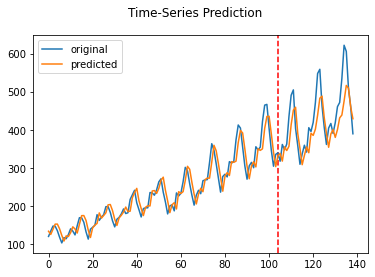

In [ ]:
# predict
#rnn.eval()
Y_predict = rnn(X_data)
Y_predict = Y_predict.data.cpu().numpy()
Y_data = Y_data.data.cpu().numpy()

inverse_scaled_Y_predict = scaler.inverse_transform(Y_predict)
inverse_scaled_Y_data = scaler.inverse_transform(Y_data)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(inverse_scaled_Y_data, label='original')
plt.plot(inverse_scaled_Y_predict,label='predicted' )
plt.suptitle('Time-Series Prediction')
plt.legend(loc='best')
plt.show()

LSTM

[코드 9.4.1]

In [ ]:
import torch
import torch.nn as nn
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print('Device:', device)

torch.manual_seed(0)  # reproducibility

# hyperparameters
learning_rate = 0.1
num_epochs = 20

char_set = ['h', 'e', 'l', 'o']

# Teach hello: hell -> ello
x_data = [[0, 1, 2, 2]] # hell
# batch_size = 1
x_one_hot = [[[1, 0, 0, 0], # ‘h'
 [0, 1, 0, 0], # ‘e'
 [0, 0, 1, 0], # ‘l'
 [0, 0, 1, 0]]] # ‘l'
y_data = [[1, 2, 2, 3]] # ello

# As we have one batch of samples, we will change them to variables only once
inputs = torch.Tensor(x_one_hot)
labels = torch.LongTensor(y_data)
inputs=inputs.to(device)
labels=labels.to(device)


num_classes = 4
input_size = 4  # one-hot size
hidden_size = 4  # output from the RNN. 4 to directly predict one-hot
batch_size = 1   # one sentence

class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        output, h_n = self.lstm(x)
        # Reshape output from (batch, seq_len, hidden_size) to (batch *
        # seq_len, hidden_size)
        output = output.view(-1, self.hidden_size)
        # Return outputs applied to fully connected layer
        out = self.fc(output)
        return out

# Instantiate RNN model

lstm = LSTM(num_classes, input_size, hidden_size)
lstm = lstm.to(device)  

# Set loss and optimizer function
loss_function = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model

for epoch in range(num_epochs):
    outputs = lstm(inputs)    
    loss = loss_function(outputs, labels.view(-1))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    result = outputs.data.cpu().numpy().argmax(axis=1)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print("epoch =", epoch+1,",", "loss=", round(loss.item(),4),",", "pred =",  ''.join(result_str)) # ello 

Device: cuda
epoch = 1 , loss= 1.3129 , pred = llll
epoch = 2 , loss= 1.2072 , pred = llll
epoch = 3 , loss= 1.1034 , pred = llll
epoch = 4 , loss= 1.0008 , pred = llll
epoch = 5 , loss= 0.8935 , pred = llll
epoch = 6 , loss= 0.7784 , pred = llll
epoch = 7 , loss= 0.6669 , pred = lllo
epoch = 8 , loss= 0.5591 , pred = lllo
epoch = 9 , loss= 0.4588 , pred = lllo
epoch = 10 , loss= 0.3709 , pred = ello
epoch = 11 , loss= 0.2911 , pred = ello
epoch = 12 , loss= 0.2282 , pred = ello
epoch = 13 , loss= 0.177 , pred = ello
epoch = 14 , loss= 0.1385 , pred = ello
epoch = 15 , loss= 0.1065 , pred = ello
epoch = 16 , loss= 0.0804 , pred = ello
epoch = 17 , loss= 0.0605 , pred = ello
epoch = 18 , loss= 0.0462 , pred = ello
epoch = 19 , loss= 0.0358 , pred = ello
epoch = 20 , loss= 0.0278 , pred = ello


[코드 9.4.2]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print('Device:', device)

airline = pd.read_csv('international-airline-passengers.csv')
#print(dataset.isnull().sum())
#print(airline.shape)
#print(airline.head())
airline = airline.iloc[:,1:2].values
#print(airline.shape)
#plt.plot(airline, label = 'Airline Passangers Data')
#plt.show()

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

scaler = MinMaxScaler()
scaler_airline = scaler.fit_transform(airline)

seq_length = 4
x, y = sliding_windows(scaler_airline, seq_length)
#print(x.shape,y.shape)
#print(x[0],y[0])
#print(x[1],y[1])

# fix random seed for reproducibility
torch.manual_seed(7)

train_size = int((3/4)*len(y))
test_size = len(y) - train_size

X_data = torch.Tensor(np.array(x))
Y_data = torch.Tensor(np.array(y))

X_data=X_data.to(device)
Y_data=Y_data.to(device)

X_train = torch.Tensor(np.array(x[0:train_size]))
Y_train = torch.Tensor(np.array(y[0:train_size]))

X_test = torch.Tensor(np.array(x[train_size:len(x)]))
Y_test = torch.Tensor(np.array(y[train_size:len(y)]))

X_train=X_train.to(device)
Y_train=Y_train.to(device)
X_test=X_test.to(device)
Y_test=Y_test.to(device)

num_epochs = 1000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = torch.zeros(
            self.num_layers, x.size(0), self.hidden_size,device=device)
        
        c_0 = torch.zeros(
            self.num_layers, x.size(0), self.hidden_size,device=device)
        
        # Propagate input through LSTM
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
        
        h_n = h_n.view(-1, self.hidden_size)
        
        result = self.fc(h_n)
        
        return result
    
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
lstm = lstm.to(device)  

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(X_train)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = loss_function(outputs, Y_train)
    
    loss.backward()
    
    optimizer.step()
    if (epoch+1)== 1:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))
    if (epoch+1) % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

Device: cuda
Epoch: 1, loss: 0.22645
Epoch: 100, loss: 0.01626
Epoch: 200, loss: 0.00331
Epoch: 300, loss: 0.00311
Epoch: 400, loss: 0.00291
Epoch: 500, loss: 0.00273
Epoch: 600, loss: 0.00256
Epoch: 700, loss: 0.00242
Epoch: 800, loss: 0.00228
Epoch: 900, loss: 0.00211
Epoch: 1000, loss: 0.00202


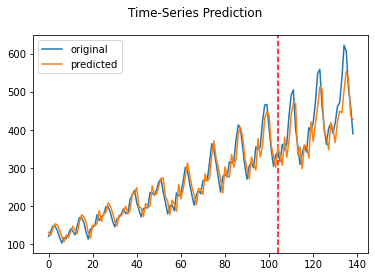

In [ ]:
# predict
#rnn.eval()
Y_predict = lstm(X_data)
Y_predict = Y_predict.data.cpu().numpy()
Y_data = Y_data.data.cpu().numpy()

inverse_scaled_Y_predict = scaler.inverse_transform(Y_predict)
inverse_scaled_Y_data = scaler.inverse_transform(Y_data)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(inverse_scaled_Y_data, label='original')
plt.plot(inverse_scaled_Y_predict,label='predicted' )
plt.suptitle('Time-Series Prediction')
plt.legend(loc='best')
plt.show()